In [1]:
# Import libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# Import and establish Base for which classes will be constructed 
from sqlalchemy import create_engine
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session

In [3]:
# Use SQLAlchemy automap_base() to reflect your tables into classes and save a reference to those classes called 
# Station and Measurement.

# create engine
engine = create_engine("sqlite:///hawaii.sqlite")

# Declare base and automap
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [4]:
# create a session
from sqlalchemy.orm import Session
session = Session(engine)

In [5]:
# assign to variables
measurement = Base.classes.measurement
station = Base.classes.station

In [66]:
# Design a query to retrieve the last 12 months of precipitation data.
# Select only the date and prcp values.

from sqlalchemy import Date, cast
import datetime as dt

today = dt.date.today()
date12today = today - dt.timedelta(days=365*2)

date12 = dt.date(2016,8,23)

#LastDate = session.query(measurement.date).order_by(measurement.date.desc()).first()
#print(LastDate)

a = session.query(measurement.date, measurement.prcp).order_by(measurement.date.desc()).\
    filter(measurement.date >= date12today).all()
        
print(a)

[('2017-08-23', 0.0), ('2017-08-23', 0.0), ('2017-08-23', 0.08), ('2017-08-23', 0.45), ('2017-08-22', 0.0), ('2017-08-22', 0.0), ('2017-08-22', 0.5), ('2017-08-21', 0.0), ('2017-08-21', 0.02), ('2017-08-21', 0.0), ('2017-08-21', 0.56), ('2017-08-20', 0.0), ('2017-08-20', 0.01), ('2017-08-20', 0.0), ('2017-08-19', 0.0), ('2017-08-19', 0.0), ('2017-08-19', 0.0), ('2017-08-19', 0.09), ('2017-08-18', 0.0), ('2017-08-18', 0.0), ('2017-08-18', 0.06), ('2017-08-18', 0.0), ('2017-08-17', 0.0), ('2017-08-17', 0.05), ('2017-08-17', 0.01), ('2017-08-17', 0.13), ('2017-08-16', 0.0), ('2017-08-16', 0.07), ('2017-08-16', 0.12), ('2017-08-16', 0.42), ('2017-08-15', 0.02), ('2017-08-15', 0.0), ('2017-08-15', 0.06), ('2017-08-15', 0.32), ('2017-08-15', 0.42), ('2017-08-14', 0.0), ('2017-08-14', 0.01), ('2017-08-14', 0.08), ('2017-08-14', 0.0), ('2017-08-14', 0.22), ('2017-08-13', 0.0), ('2017-08-13', 0.0), ('2017-08-13', 0.0), ('2017-08-13', 0.0), ('2017-08-13', 0.0), ('2017-08-12', 0.0), ('2017-08-12'

In [51]:
# Load the query results into a Pandas DataFrame and set the index to the date column.
prcp_db = pd.DataFrame(a)
prcp_db.count()
#prcp_db['date'] = pd.to_datetime(prcp_db['date'])
prcp_db = prcp_db.sort_index(ascending=False)
prcp_db = prcp_db.reset_index()
prcp_db.head()

,index,prcp,date
0,2222,1.45,2016-08-24
1,2221,2.15,2016-08-24
2,2220,1.22,2016-08-24
3,2219,0.00,2016-08-24
4,2218,2.28,2016-08-24


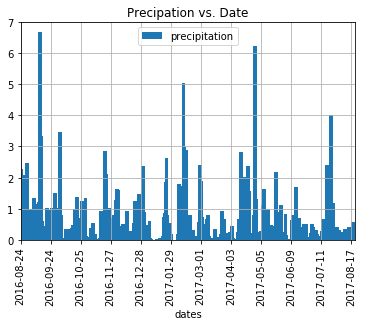

In [52]:
# Plot the results using the DataFrame plot method.
length = prcp_db['prcp'].count()
ticks = np.arange(length)

ticks_bin = np.arange(0, length, 200)
labels = []
for x in ticks_bin:
    labels.append(prcp_db.loc[x,'date'])
    
barwidth = 25

plt.bar(ticks, prcp_db['prcp'], label = 'precipitation', width = barwidth)
plt.xticks(ticks_bin, labels, rotation = 90)
plt.legend(loc = 'upper center')
plt.xlim(0,2230)
plt.ylim(0,7)
plt.xlabel('dates')
plt.title('Precipation vs. Date')

plt.grid(True)

plt.show()

In [53]:
#Design a query to calculate the total number of stations.
b = session.query(station.name).count()
print(b)

9


In [54]:
# Design a query to find the most active stations.
# -List the stations and observation counts in descending order
# -Which station has the highest number of observations?
from sqlalchemy import func
c = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).\
    all()
print(c)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [55]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs).
# -Filter by the station with the highest number of observations.

d = session.execute(
    "SELECT station.station, count(measurement.tobs)\
     FROM station\
     LEFT JOIN measurement ON station.station = measurement.station AND measurement.date >= '2016-8-23'\
     GROUP BY station.station\
     ORDER BY count(measurement.tobs) DESC"
    ).fetchall()

print(d)

[('USC00519397', 230), ('USC00516128', 222), ('USC00519281', 221), ('USC00513117', 212), ('USC00519523', 210), ('USC00514830', 195), ('USC00517948', 107), ('USC00511918', 0), ('USC00518838', 0)]


In [56]:
# Load the query results into a Pandas DataFrame and set the index to the date column.
tobs_db = pd.DataFrame(d, columns=['Station', 'Count'])
#prcp_db['date'] = pd.to_datetime(prcp_db['date'])
#tobs_db = prcp_db.sort_index(ascending=False)
#tobs_db = prcp_db.reset_index()
tobs_db.head(10)

,Station,Count
0,USC00519397,230
1,USC00516128,222
2,USC00519281,221
3,USC00513117,212
4,USC00519523,210
5,USC00514830,195
6,USC00517948,107
7,USC00511918,0
8,USC00518838,0


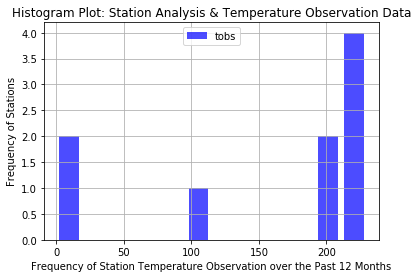

In [57]:
# -Plot the results as a histogram with bins=12.
plt.grid(True)

n, bins, patches = plt.hist(tobs_db['Count'], label = "tobs", bins=12, color='blue',
                            alpha=0.7, rwidth=0.75)
plt.xlabel("Frequency of Station Temperature Observation over the Past 12 Months")
plt.ylabel('Frequency of Stations')
plt.title("Histogram Plot: Station Analysis & Temperature Observation Data")
plt.legend(loc = "upper center")
plt.show()

In [58]:
# Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d and 
# return the minimum, average, and maximum temperatures for that range of dates.

def calc_temps(StartDate,EndDate):
    #finds min
    minTemp = session.query(func.min(measurement.tobs)).\
    filter(measurement.date <= EndDate, measurement.date >= StartDate).all()
    #finds average
    avgTemp = session.query(func.avg(measurement.tobs)).\
    filter(measurement.date <= EndDate, measurement.date >= StartDate).all()
    avgTemp = format(avgTemp[0][0],'.2f')
    #find max
    maxTemp = session.query(func.max(measurement.tobs)).\
    filter(measurement.date <= EndDate, measurement.date >= StartDate).all()
    
    
    return minTemp[0][0], avgTemp, maxTemp[0][0]


In [59]:
#Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates 
#from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

# Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total
Start = '2017-05-19'
End = '2017-05-31'

minimum, average, maximum = calc_temps(Start, End)
print(f'Trip Starts: {Start} and Ends: {End}')
print(f'Minimum Temp: {minimum}')
print(f'Maximum Temp: {maximum}')
print(f'Average Temp: {average}')


Trip Starts: 2017-05-19 and Ends: 2017-05-31
Minimum Temp: 68
Maximum Temp: 87
Average Temp: 75.32


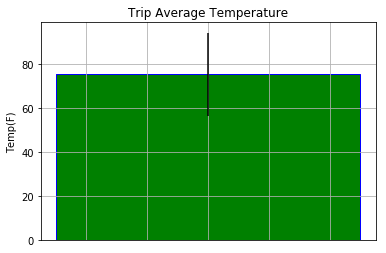

In [60]:
# Plot the min, avg, and max temperature from your previous query as a bar chart.
# -Use the average temperature as the bar height.
# -Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

plt.grid()
n = np.arange(1)

plt.bar(0, float(average), yerr=(maximum - minimum), width = 0.25, color = "green", edgecolor = 'blue')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.title('Trip Average Temperature')
plt.ylabel('Temp(F)')

plt.show()